In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split

In [35]:
file_path = "data/sugar_firm_data.xlsx"
# Define data types for columns
dtype_mapping = {
    'firm': str, 
    'province': str, 
    'year': int, 
    'day_mill': int, 
    'cane_ub': float, 
    'cane_b': float,
    'cane_total': float, 
    'ccs': float, 
    'sugar_w': float, 
    'sugar_p': float, 
    'sugar_total': float, 
    'raws_bulk': float,
    'raws_ks': float, 
    'raws_total': float, 
    'sugar_oth': float, 
    'sugar_all': float, 
    'sugar_yield': float,
    'molass': float, 
    'molass_yield': float
}
# Read the Excel file with specified data types
df = pd.read_excel(file_path, sheet_name="Sheet3", header=0, dtype=dtype_mapping)

# Add policies dummy variables
df['50tb'] = (df['year'].between(2018, 2020)).astype(int)
df['120tb'] = (df['year'].between(2021, 2022)).astype(int)


# Read the Excel file
# df = pd.read_excel(file_path, sheet_name="Sheet3", header=0)
df.dtypes

firm             object
province         object
year              int32
day_mill          int32
cane_ub         float64
cane_b          float64
cane_total      float64
ccs             float64
sugar_w         float64
sugar_p         float64
sugar_total     float64
raws_bulk       float64
raws_ks         float64
raws_total      float64
sugar_oth       float64
sugar_all       float64
sugar_yield     float64
molass          float64
molass_yield    float64
50tb              int32
120tb             int32
dtype: object

In [41]:
df.describe()

,year,day_mill,cane_ub,cane_b,cane_total,ccs,sugar_w,sugar_p,sugar_total,raws_bulk,raws_ks,raws_total,sugar_oth,sugar_all,sugar_yield,molass,molass_yield,50tb,120tb
count,1051.000000,1051.000000,1.051000e+03,1.051000e+03,1.051000e+03,1051.000000,1.050000e+03,1.049000e+03,1.051000e+03,1051.000000,1.046000e+03,1.051000e+03,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,2012.516651,120.861085,7.340976e+05,9.676059e+05,1.701703e+06,12.093306,2.965521e+05,3.315395e+05,6.271785e+05,112755.862951,4.384429e+04,1.171194e+06,26384.600102,1.824757e+06,105.184008,73897.974063,44.009099,0.160799,0.108468
std,6.095624,29.714478,6.033397e+05,8.388150e+05,1.185142e+06,0.930575,2.717406e+05,3.716783e+05,4.731862e+05,104298.357010,1.368208e+05,1.069333e+06,84513.947033,1.317108e+06,9.408900,51249.581888,5.248310,0.367521,0.311119
min,2002.000000,22.000000,1.561349e+04,8.605300e+03,2.648928e+04,9.790978,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.707370e+04,48.717415,697.500000,26.331407,0.000000,0.000000
25%,2007.000000,100.000000,3.174437e+05,3.607511e+05,8.696616e+05,11.400000,1.170354e+05,0.000000e+00,2.971648e+05,31606.031000,0.000000e+00,3.357375e+05,0.000000,8.693615e+05,98.811154,37991.300000,40.558422,0.000000,0.000000
50%,2013.000000,117.000000,5.759144e+05,7.255534e+05,1.366833e+06,12.045063,2.353840e+05,2.400290e+05,5.515735e+05,81528.053000,0.000000e+00,8.879741e+05,0.000000,1.438486e+06,105.254773,58420.680000,43.770656,0.000000,0.000000
75%,2018.000000,138.000000,9.527186e+05,1.322574e+06,2.321452e+06,12.718058,4.049283e+05,5.107100e+05,8.825831e+05,158783.343000,1.018206e+03,1.629426e+06,608.375000,2.523574e+06,111.296381,97867.120500,46.914459,0.000000,0.000000
max,2022.000000,276.000000,3.819377e+06,5.610617e+06,7.265671e+06,14.810000,2.465218e+06,2.095360e+06,3.093715e+06,630629.940000,1.459144e+06,6.407466e+06,819180.937000,7.346079e+06,132.425621,320086.440000,66.601521,1.000000,1.000000


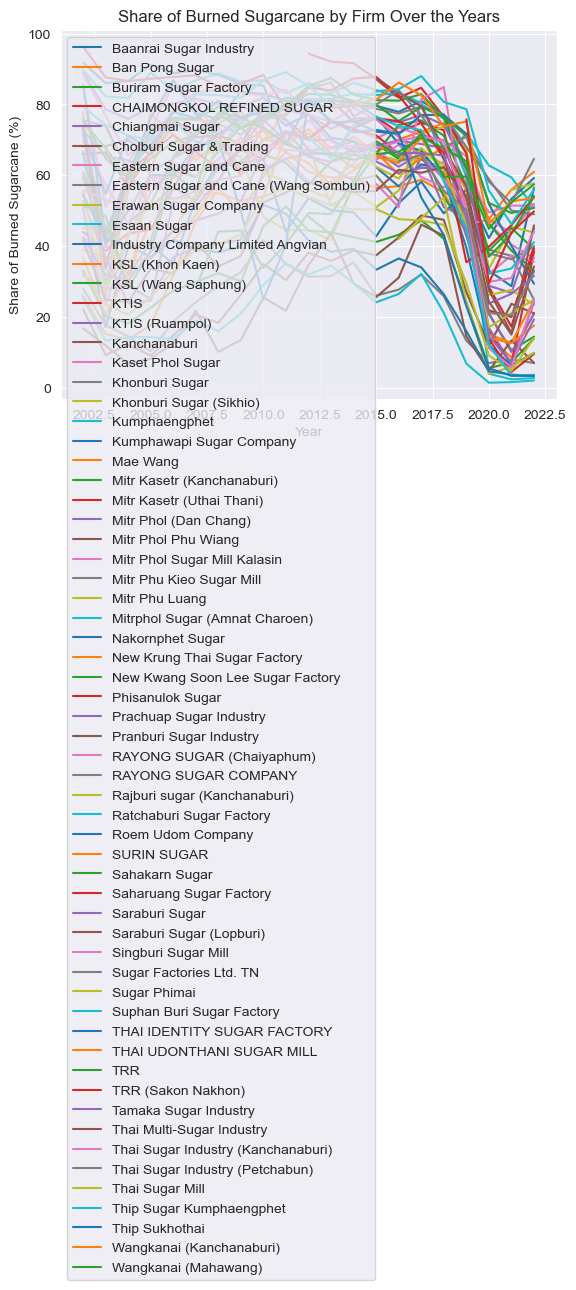

In [24]:
# plot share of burned sugarcane
df['share_b'] =df['cane_b']/df['cane_total']*100
# Calculate the share of burned sugarcane
df['share_b'] = df['cane_b'] / df['cane_total'] * 100

# Group by firm and plot the share of burned sugarcane over the years
for firm, data in df.groupby('firm'):
    plt.plot(data['year'], data['share_b'], label=firm)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Share of Burned Sugarcane (%)')
plt.title('Share of Burned Sugarcane by Firm Over the Years')
plt.legend()

# Display the plot
plt.show()

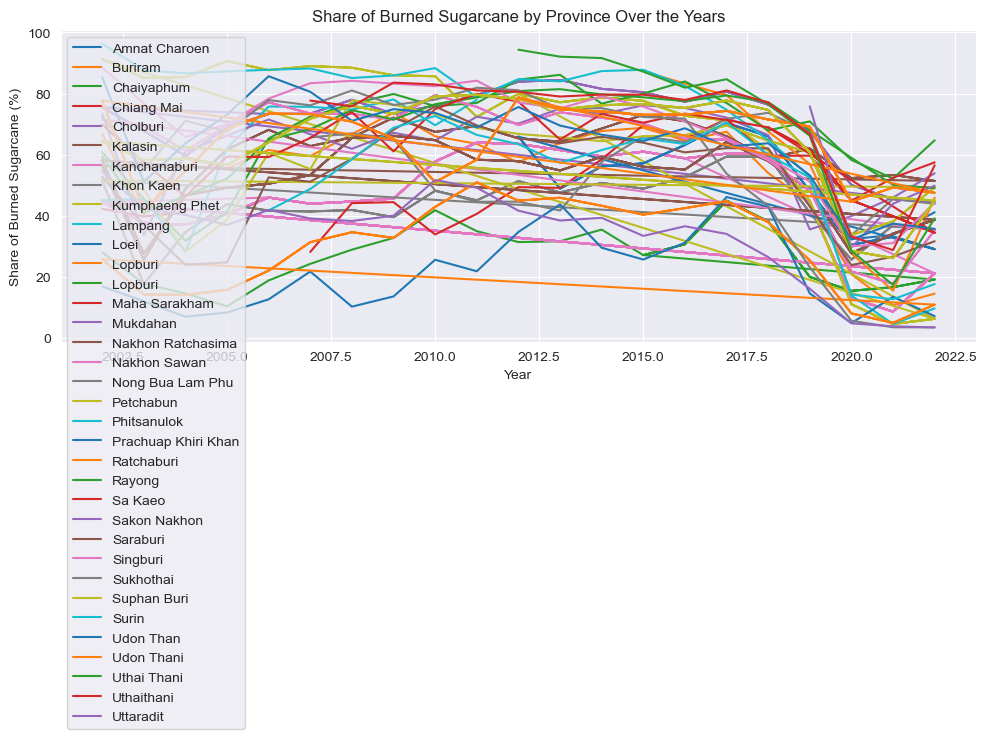

In [25]:
# Calculate the share of burned sugarcane by province
df['share_b_prov'] = df.groupby(['year', 'province'])['cane_b'].transform('sum') / df.groupby(['year', 'province'])['cane_total'].transform('sum') * 100

# Plot the share of burned sugarcane by province
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for province, data in df.groupby('province'):
    plt.plot(data['year'], data['share_b_prov'], label=province)

plt.xlabel('Year')
plt.ylabel('Share of Burned Sugarcane (%)')
plt.title('Share of Burned Sugarcane by Province Over the Years')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

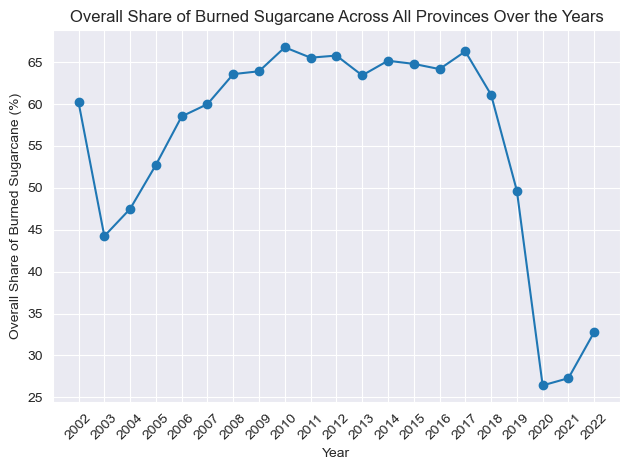

In [28]:
# Calculate the overall share of burned sugarcane across all provinces for each year
overall_share = df.groupby('year').apply(lambda x: (x['cane_b'].sum() / x['cane_total'].sum()) * 100)

# Plot the overall share of burned sugarcane across all provinces over the years
plt.plot(overall_share.index, overall_share.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Overall Share of Burned Sugarcane (%)')
plt.title('Overall Share of Burned Sugarcane Across All Provinces Over the Years')
plt.grid(True)


# Set x-axis tick locations with integer values
plt.xticks(overall_share.index.astype(int), rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

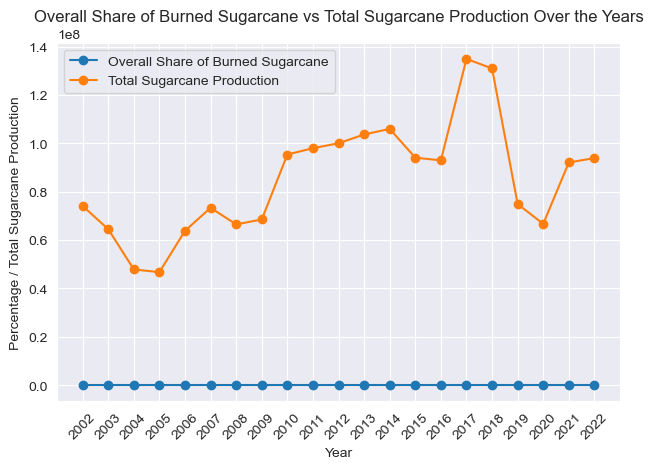

In [29]:
# Calculate the overall share of burned sugarcane across all provinces for each year
overall_share = df.groupby('year').apply(lambda x: (x['cane_b'].sum() / x['cane_total'].sum()) * 100)

# Calculate the total sugarcane production for each year
total_cane_production = df.groupby('year')['cane_total'].sum()/df.groupby('year')['cane_total'][]

# Plot the overall share of burned sugarcane and total sugarcane production over the years
plt.plot(overall_share.index, overall_share.values, marker='o', label='Overall Share of Burned Sugarcane')
plt.plot(total_cane_production.index, total_cane_production.values, marker='o', label='Total Sugarcane Production')
plt.xlabel('Year')
plt.ylabel('Percentage / Total Sugarcane Production')
plt.title('Overall Share of Burned Sugarcane vs Total Sugarcane Production Over the Years')
plt.grid(True)

# Set x-axis tick locations with integer values
plt.xticks(overall_share.index.astype(int), rotation=45)  # Rotate x-axis labels for better readability

plt.legend()
plt.tight_layout() 


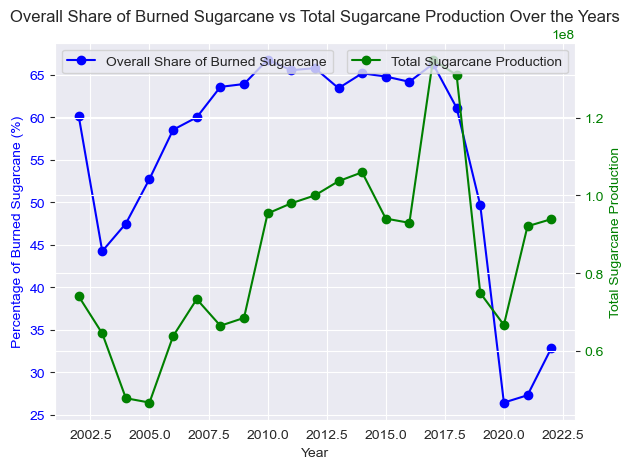

In [30]:
# Calculate the overall share of burned sugarcane across all provinces for each year
overall_share = df.groupby('year').apply(lambda x: (x['cane_b'].sum() / x['cane_total'].sum()) * 100)

# Calculate the total sugarcane production for each year
total_cane_production = df.groupby('year')['cane_total'].sum()

# Create a figure and primary axis
fig, ax1 = plt.subplots()

# Plot the overall share of burned sugarcane on the primary axis
ax1.plot(overall_share.index, overall_share.values, marker='o', label='Overall Share of Burned Sugarcane', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Burned Sugarcane (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot the total sugarcane production on the secondary axis
ax2.plot(total_cane_production.index, total_cane_production.values, marker='o', label='Total Sugarcane Production', color='green')
ax2.set_ylabel('Total Sugarcane Production', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('Overall Share of Burned Sugarcane vs Total Sugarcane Production Over the Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

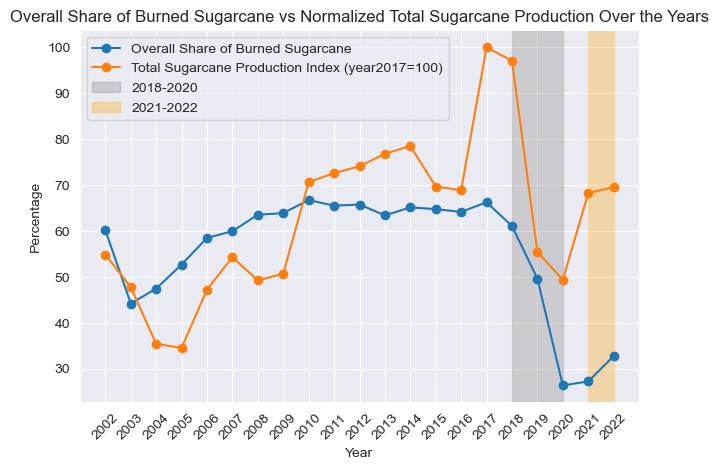

In [43]:
# Calculate the overall share of burned sugarcane across all provinces for each year
overall_share = df.groupby('year').apply(lambda x: (x['cane_b'].sum() / x['cane_total'].sum()) * 100)

# Calculate the normalized total sugarcane production for each year (scaled by year 2017)
total_cane_production = df.groupby('year')['cane_total'].sum()
total_cane_production_normalized = total_cane_production / total_cane_production.loc[2017] * 100

# Plot the overall share of burned sugarcane and normalized total sugarcane production over the years
plt.plot(overall_share.index, overall_share.values, marker='o', label='Overall Share of Burned Sugarcane')
plt.plot(total_cane_production_normalized.index, total_cane_production_normalized.values, marker='o', label='Total Sugarcane Production Index (year2017=100)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Overall Share of Burned Sugarcane vs Normalized Total Sugarcane Production Over the Years')
plt.grid(True)

# Set x-axis tick locations with integer values
plt.xticks(overall_share.index.astype(int), rotation=45)  # Rotate x-axis labels for better readability

# Highlight regions
plt.axvspan(2018, 2020, color='gray', alpha=0.3, label='2018-2020')
plt.axvspan(2021, 2022, color='orange', alpha=0.3, label='2021-2022')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()